<a href="https://colab.research.google.com/github/Joako360/osm2terrn/blob/main/osm2tern_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
import osmnx as ox
import shapely
from utils.extras import OPENTOPO_ELEVATION_API_KEY, custom_tags
from utils.transform import translate_gdf

In [ ]:

ox.settings.elevation_url_template = 'https://api.opentopodata.org/v1/test-dataset?locations={locations}' # type: ignore
ox.settings.log_console = True # type: ignore
ox.settings.useful_tags_way = ox.settings.useful_tags_way + custom_tags # type: ignore
ox.__version__

'2.0.1'

In [3]:

# get the street network for luis guillon
place = 'Luis Guillón, Buenos Aires, Argentina'
place_query = {'city':'Luis Guillón', 'state':'Buenos Aires', 'country':'Argentina'}
G = ox.graph_from_place(place_query, network_type='drive', simplify=True)
G = ox.add_node_elevations_google(G, api_key=None, batch_size=100, pause=1)
G = ox.add_edge_bearings(G)
G = ox.add_edge_grades(G)
G_proj = ox.project_graph(G)
nodes, edges=ox.graph_to_gdfs(G_proj)
area=ox.geocode_to_gdf(place_query)
area_proj=ox.projection.project_gdf(area)
x_0 = area_proj.bounds.minx[0]
y_0 = area_proj.bounds.maxy[0]
area_trns=translate_gdf(area_proj)
nodes_trns=translate_gdf(nodes,x_0,y_0)
edges_trns=translate_gdf(edges,x_0,y_0)
buildings=ox.features_from_place(place_query,{'building': True})
buildings_proj=ox.projection.project_gdf(buildings)
buildings_trns=translate_gdf(buildings_proj,x_0,y_0)

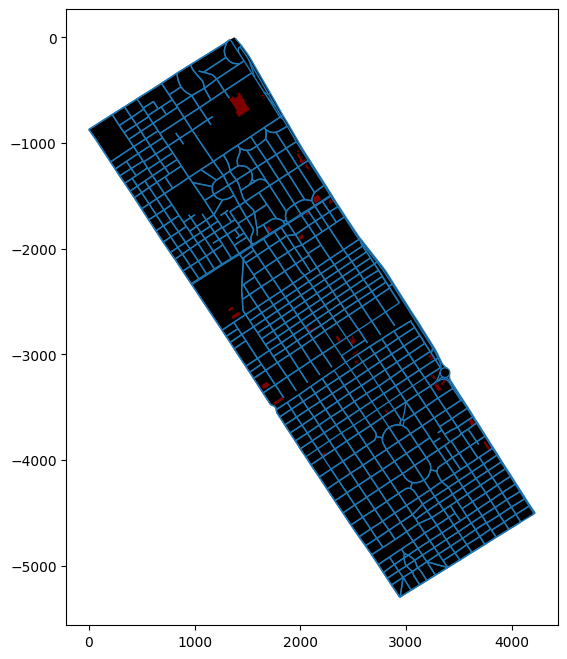

In [4]:

fig, ax = plt.subplots(figsize=[12,8])
area_trns.plot(ax=ax,facecolor='k')
edges_trns.plot(ax=ax,linewidth=1)
buildings_trns.plot(ax=ax,facecolor='r',alpha=0.5)
plt.show()
# lat=np.arange(area.bbox_south[0],area.bbox_north[0],1/3600)
# lon=np.arange(area.bbox_west[0],area.bbox_east[0],1/3600)

In [48]:
area.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
bounds = gpd.GeoDataFrame(
    geometry=[shapely.box(area.total_bounds[0], area.total_bounds[1], area.total_bounds[2], area.total_bounds[3])],
    crs=area.crs
)
west, south, east, north = bounds.bounds.loc[0].values
print(west, south, east, north)

-58.4759119 -34.8241548 -58.4303363 -34.7761946


In [45]:
bbox = gpd.GeoDataFrame(
    geometry=[shapely.box(-73.9847, 40.7666, -73.9810, 40.7694)], 
    crs=4326
)

In [47]:
bbox.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich